<a href="https://colab.research.google.com/github/swastikbanerjee/Projects_ML/blob/main/MarketBasketOptimisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Python Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns.fpgrowth import fpgrowth

Importing Dataset

In [ ]:
data = pd.read_csv("/content/Market_Basket_Optimisation.csv")

Data Analysis

In [ ]:
data.shape

(7500, 20)

In [ ]:
data.head()

,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
0,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,low fat yogurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Converting Dataframe into list of lists

In [ ]:
list_of_lists = [row.dropna().tolist() for index,row in data.iterrows()]
print(list_of_lists)

[['burgers', 'meatballs', 'eggs'], ['chutney'], ['turkey', 'avocado'], ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea'], ['low fat yogurt'], ['whole wheat pasta', 'french fries'], ['soup', 'light cream', 'shallot'], ['frozen vegetables', 'spaghetti', 'green tea'], ['french fries'], ['eggs', 'pet food'], ['cookies'], ['turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil'], ['spaghetti', 'champagne', 'cookies'], ['mineral water', 'salmon'], ['mineral water'], ['shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt'], ['turkey', 'eggs'], ['turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate'], ['meatballs', 'milk', 'honey', 'french fries', 'protein bar'], ['red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo'], ['rice', 'sparkling water'], ['spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea'], ['burgers', 'grated chee

Visualising flattened list

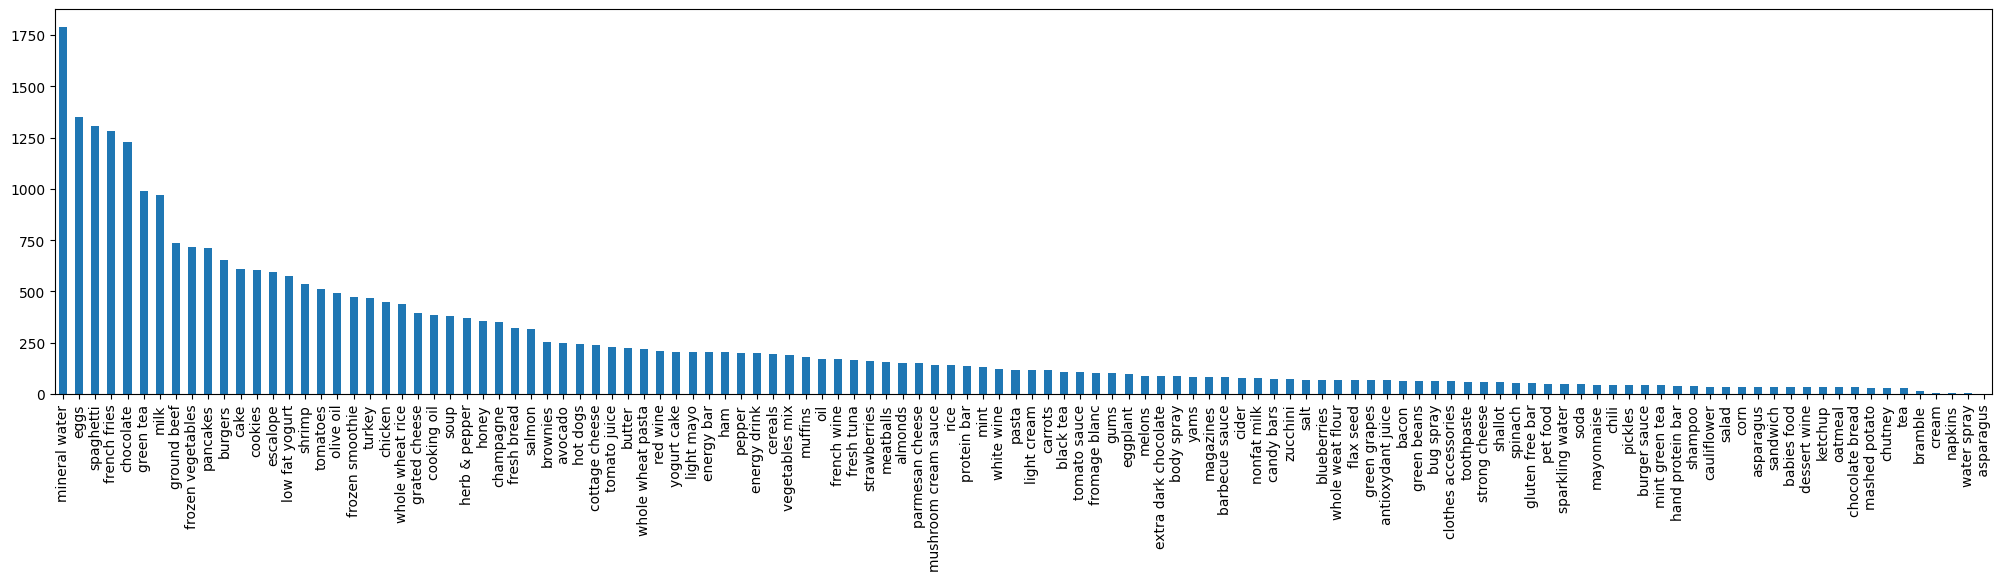

In [ ]:
flattened_list = [x for i in list_of_lists for x in i]
pd.Series(flattened_list).value_counts().plot(kind='bar', figsize=(25,5))
plt.show()

In [ ]:
print(flattened_list)

['burgers', 'meatballs', 'eggs', 'chutney', 'turkey', 'avocado', 'mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea', 'low fat yogurt', 'whole wheat pasta', 'french fries', 'soup', 'light cream', 'shallot', 'frozen vegetables', 'spaghetti', 'green tea', 'french fries', 'eggs', 'pet food', 'cookies', 'turkey', 'burgers', 'mineral water', 'eggs', 'cooking oil', 'spaghetti', 'champagne', 'cookies', 'mineral water', 'salmon', 'mineral water', 'shrimp', 'chocolate', 'chicken', 'honey', 'oil', 'cooking oil', 'low fat yogurt', 'turkey', 'eggs', 'turkey', 'fresh tuna', 'tomatoes', 'spaghetti', 'mineral water', 'black tea', 'salmon', 'eggs', 'chicken', 'extra dark chocolate', 'meatballs', 'milk', 'honey', 'french fries', 'protein bar', 'red wine', 'shrimp', 'pasta', 'pepper', 'eggs', 'chocolate', 'shampoo', 'rice', 'sparkling water', 'spaghetti', 'mineral water', 'ham', 'body spray', 'pancakes', 'green tea', 'burgers', 'grated cheese', 'shrimp', 'pasta', 'avocado', 'honey', '

In [ ]:
items = list(set(x for y in list_of_lists for x in y))
df = pd.DataFrame(0, index=range(7500), columns = items)
df

,cookies,salt,fresh tuna,tomato juice,red wine,dessert wine,honey,soda,ketchup,bug spray,...,vegetables mix,cake,salmon,bramble,magazines,soup,avocado,mushroom cream sauce,chocolate,green tea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Binary Matrix Creation

In [ ]:
c = -1
for x in list_of_lists:
  c+=1
  for y in x:
      df.at[c,y] = 1
df

,cookies,salt,fresh tuna,tomato juice,red wine,dessert wine,honey,soda,ketchup,bug spray,...,vegetables mix,cake,salmon,bramble,magazines,soup,avocado,mushroom cream sauce,chocolate,green tea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7496,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
7497,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7498,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Frequent Itemsets obtained from FP Growth Algorithm

In [ ]:
frequent_itemset = apriori(df,min_support=0.01,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.080400,(cookies)
1,0.022267,(fresh tuna)
2,0.030267,(tomato juice)
3,0.028133,(red wine)
4,0.047333,(honey)
...,...,...
254,0.011067,"(milk, mineral water, ground beef)"
255,0.014000,"(milk, mineral water, chocolate)"
256,0.010133,"(mineral water, ground beef, eggs)"
257,0.013467,"(mineral water, chocolate, eggs)"


Apriori Association Rules

In [ ]:
rulea = association_rules(frequent_itemset, metric='lift', min_threshold=1)
rulea

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(cookies),(green tea),0.080400,0.132000,0.012000,0.149254,1.130710,0.001387,1.020281,0.125707
1,(green tea),(cookies),0.132000,0.080400,0.012000,0.090909,1.130710,0.001387,1.011560,0.133180
2,(red wine),(spaghetti),0.028133,0.174133,0.010267,0.364929,2.095687,0.005368,1.300432,0.537964
3,(spaghetti),(red wine),0.174133,0.028133,0.010267,0.058959,2.095687,0.005368,1.032757,0.633068
4,(mineral water),(red wine),0.238267,0.028133,0.010933,0.045887,1.631053,0.004230,1.018607,0.507919
...,...,...,...,...,...,...,...,...,...,...
403,"(mineral water, ground beef)",(chocolate),0.040933,0.163867,0.010933,0.267101,1.629990,0.004226,1.140857,0.402995
404,"(chocolate, ground beef)",(mineral water),0.023067,0.238267,0.010933,0.473988,1.989319,0.005437,1.448130,0.509058
405,(mineral water),"(chocolate, ground beef)",0.238267,0.023067,0.010933,0.045887,1.989319,0.005437,1.023918,0.652873
406,(chocolate),"(mineral water, ground beef)",0.163867,0.040933,0.010933,0.066721,1.629990,0.004226,1.027631,0.462246


Frequent Itemsets obtained from FP Growth Algorithm

In [ ]:
freq_itemset = fpgrowth(df,min_support=0.01,use_colnames=True)
freq_itemset

,support,itemsets
0,0.179733,(eggs)
1,0.087200,(burgers)
2,0.020933,(meatballs)
3,0.062533,(turkey)
4,0.033200,(avocado)
...,...,...
254,0.014133,"(olive oil, ground beef)"
255,0.011333,"(frozen vegetables, olive oil)"
256,0.012000,"(olive oil, eggs)"
257,0.010800,"(olive oil, pancakes)"


FP-Growth Association Rules

In [ ]:
rulep = association_rules(freq_itemset, metric='lift', min_threshold=1)
rulep

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(mineral water),(eggs),0.238267,0.179733,0.050933,0.213766,1.189351,0.008109,1.043286,0.209004
1,(eggs),(mineral water),0.179733,0.238267,0.050933,0.283383,1.189351,0.008109,1.062957,0.194090
2,(burgers),(eggs),0.087200,0.179733,0.028800,0.330275,1.837585,0.013127,1.224782,0.499351
3,(eggs),(burgers),0.179733,0.087200,0.028800,0.160237,1.837585,0.013127,1.086974,0.555682
4,(mineral water),(burgers),0.238267,0.087200,0.024400,0.102406,1.174384,0.003623,1.016941,0.194936
...,...,...,...,...,...,...,...,...,...,...
403,"(mineral water, spaghetti)",(olive oil),0.059733,0.065733,0.010267,0.171875,2.614731,0.006340,1.128171,0.656783
404,"(olive oil, spaghetti)",(mineral water),0.022933,0.238267,0.010267,0.447674,1.878880,0.004802,1.379138,0.478747
405,(mineral water),"(olive oil, spaghetti)",0.238267,0.022933,0.010267,0.043089,1.878880,0.004802,1.021063,0.614084
406,(olive oil),"(mineral water, spaghetti)",0.065733,0.059733,0.010267,0.156187,2.614731,0.006340,1.114306,0.661001


Frequent Itemsets sorted in descending order

In [ ]:
sorted_freq_itemset = freq_itemset.sort_values(by='support', ascending=False)
print(sorted_freq_itemset)

      support                                  itemsets
5    0.238267                           (mineral water)
0    0.179733                                    (eggs)
15   0.174133                               (spaghetti)
11   0.170933                            (french fries)
21   0.163867                               (chocolate)
..        ...                                       ...
130  0.010133                         (chocolate, soup)
126  0.010133  (spaghetti, mineral water, french fries)
122  0.010133       (frozen vegetables, low fat yogurt)
230  0.010000      (frozen smoothie, frozen vegetables)
171  0.010000                    (shrimp, french fries)

[259 rows x 2 columns]


Best Choices (by lift)

In [ ]:
best_choices=rulea.sort_values(by='lift',ascending=False)
print('Best Choices are...')
print(best_choices[['antecedents','consequents','lift']])

Best Choices are...
                    antecedents                 consequents      lift
227               (ground beef)             (herb & pepper)  3.291555
226             (herb & pepper)               (ground beef)  3.291555
351               (ground beef)  (mineral water, spaghetti)  2.907540
350  (mineral water, spaghetti)               (ground beef)  2.907540
325  (mineral water, spaghetti)                 (olive oil)  2.614731
..                          ...                         ...       ...
13               (french fries)            (low fat yogurt)  1.020983
156                 (olive oil)                      (eggs)  1.015704
157                      (eggs)                 (olive oil)  1.015704
53                  (spaghetti)                  (escalope)  1.013422
52                   (escalope)                 (spaghetti)  1.013422

[408 rows x 3 columns]


Best Choices (by confidence)

In [ ]:
best_choices=rulea.sort_values(by='confidence',ascending=False)
print('Best Choices are...')
print(best_choices[['antecedents','consequents','confidence']])

Best Choices are...
                   antecedents                consequents  confidence
392        (ground beef, eggs)            (mineral water)    0.506667
379        (milk, ground beef)            (mineral water)    0.503030
404   (chocolate, ground beef)            (mineral water)    0.473988
368  (milk, frozen vegetables)            (mineral water)    0.468927
249                     (soup)            (mineral water)    0.456464
..                         ...                        ...         ...
405            (mineral water)   (chocolate, ground beef)    0.045887
50             (mineral water)                  (cereals)    0.043089
327            (mineral water)     (olive oil, spaghetti)    0.043089
393            (mineral water)        (ground beef, eggs)    0.042529
311            (mineral water)  (french fries, spaghetti)    0.042529

[408 rows x 3 columns]


In [ ]:
sfi = sorted_freq_itemset[:15]
sfi

,support,itemsets
5,0.238267,(mineral water)
0,0.179733,(eggs)
15,0.174133,(spaghetti)
11,0.170933,(french fries)
21,0.163867,(chocolate)
6,0.132000,(green tea)
7,0.129600,(milk)
42,0.098267,(ground beef)
16,0.095333,(frozen vegetables)
35,0.095067,(pancakes)


Pie Chart for Frequent Itemsets

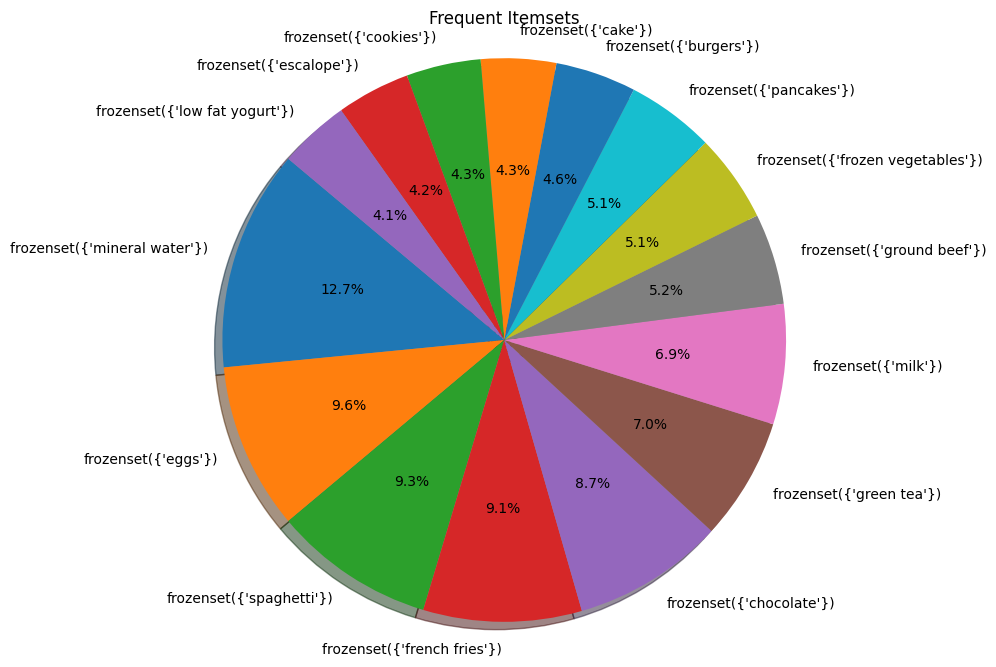

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(sfi['support'], labels=sfi['itemsets'], autopct='%1.1f%%', startangle=140, shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Frequent Itemsets')
plt.show()

Association Rules Strength - Heatmap

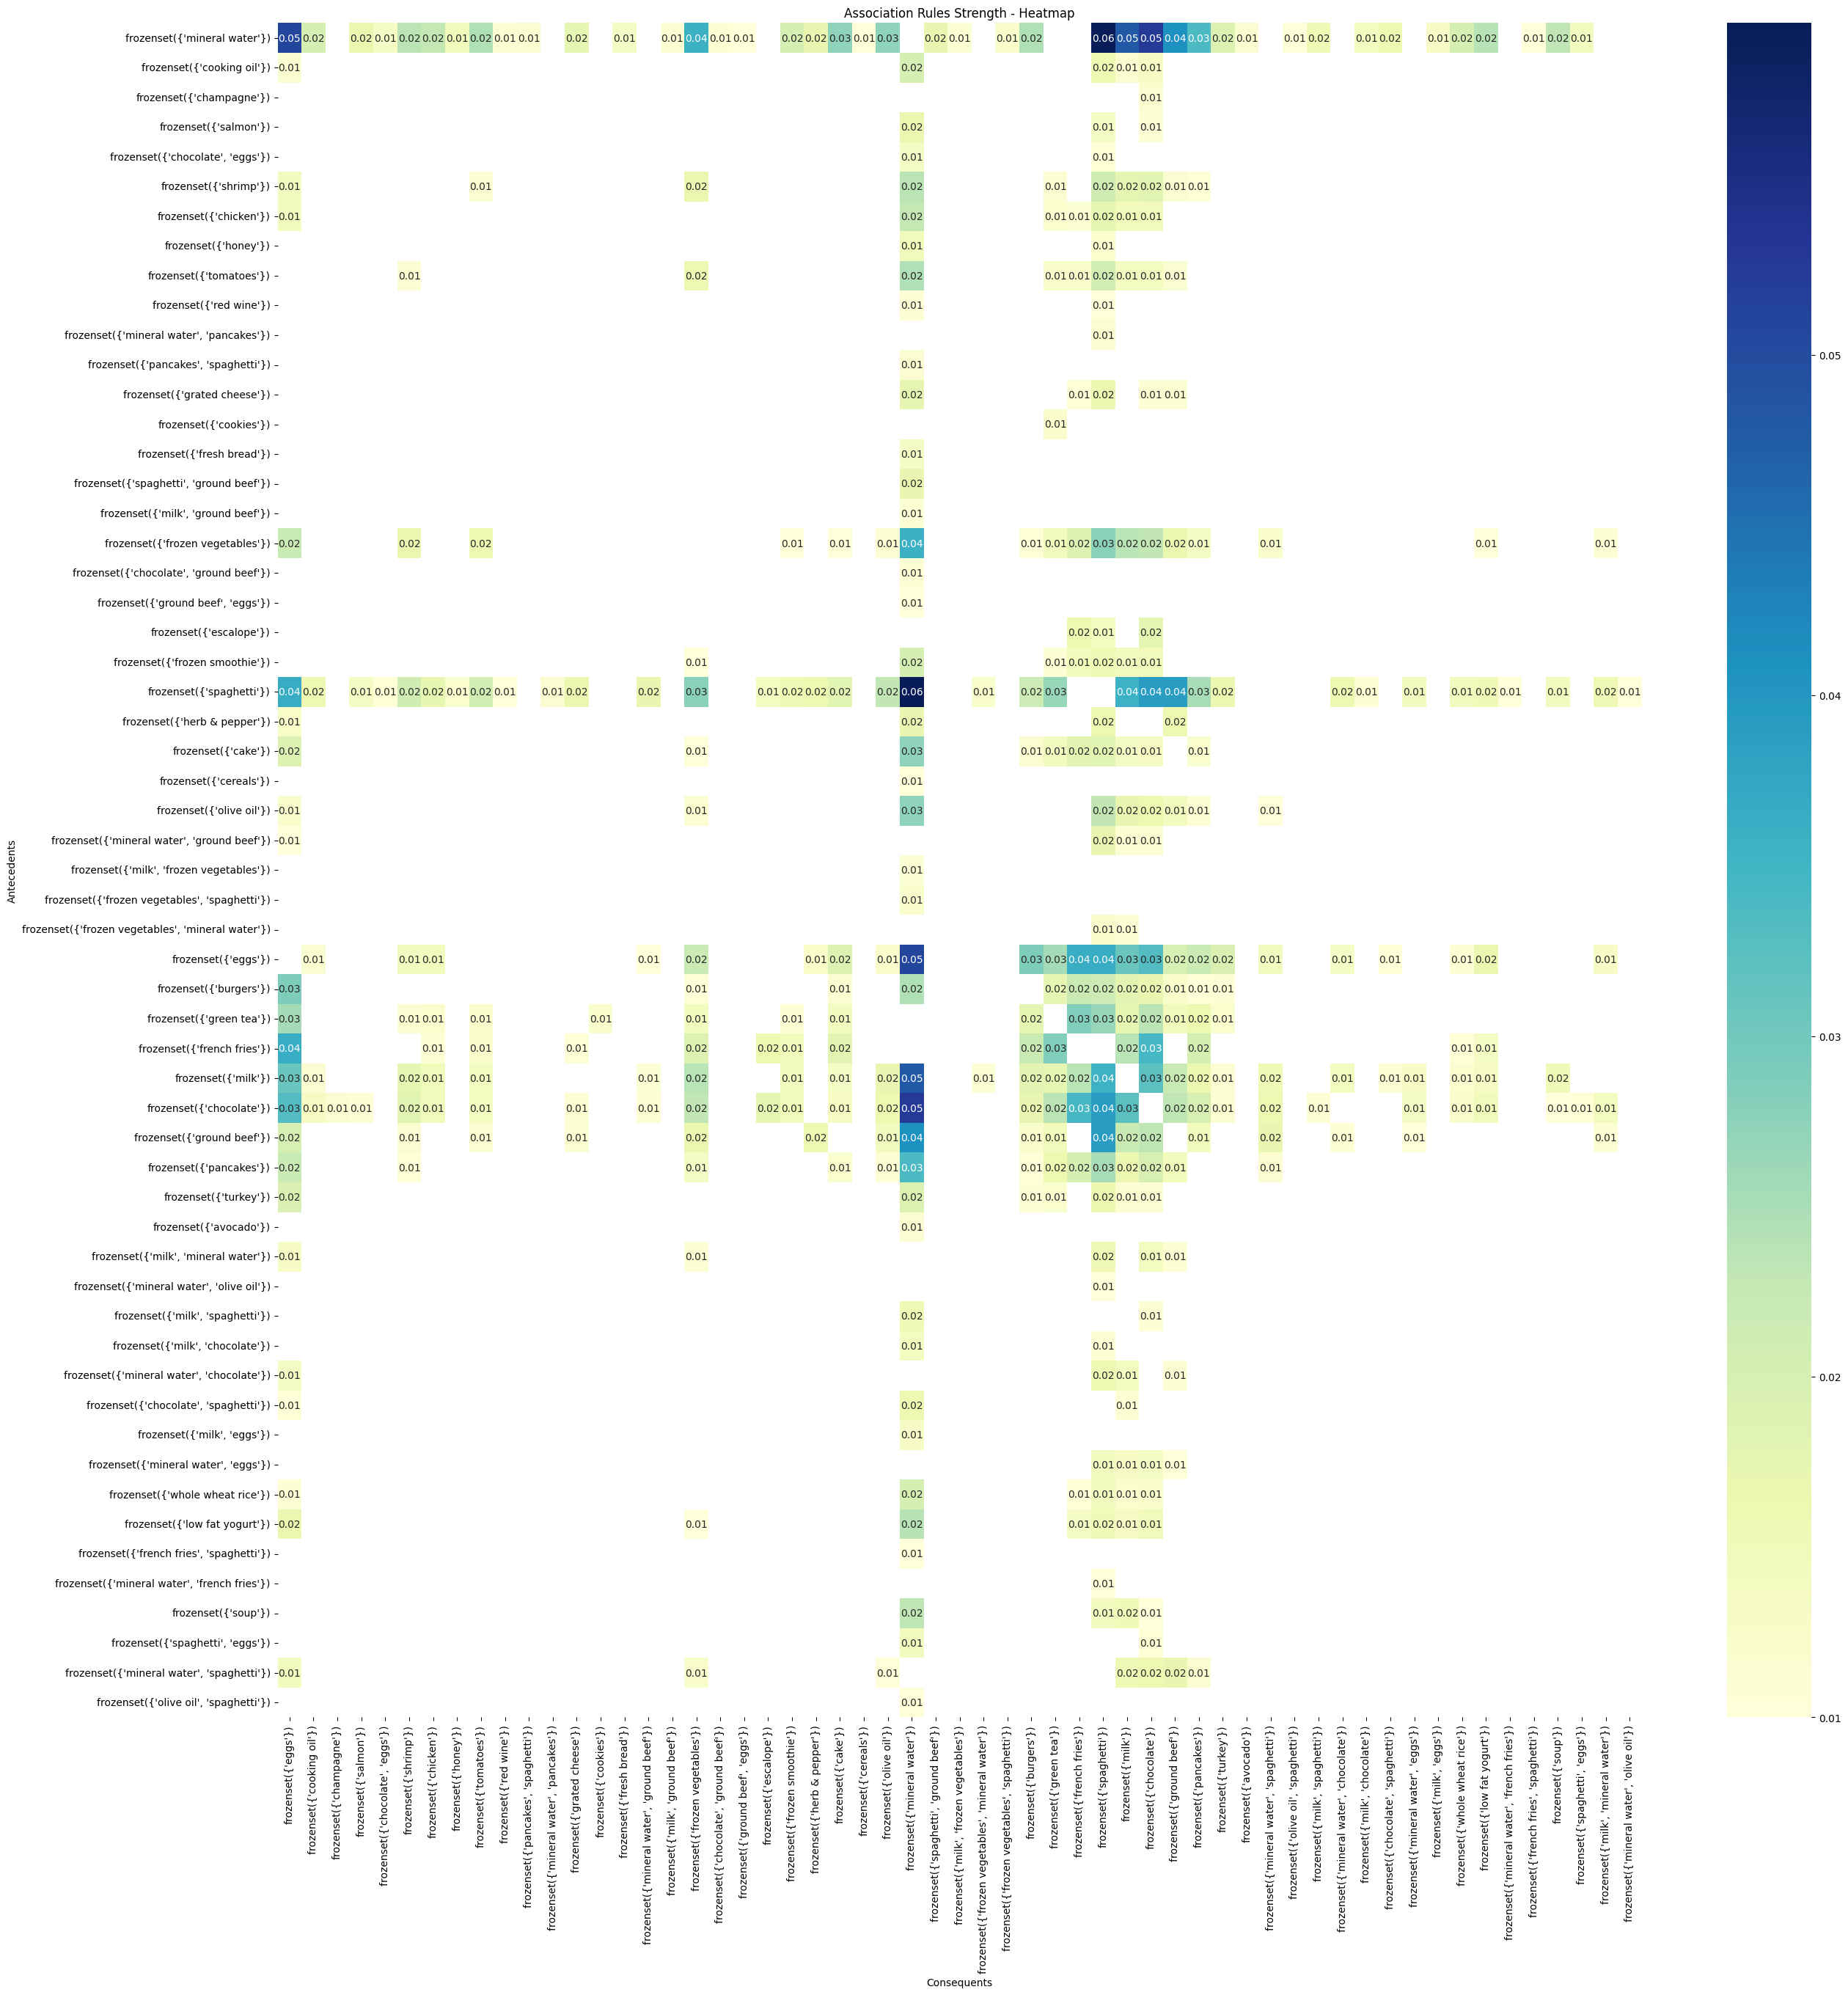

In [ ]:
pivot_table = rulep.pivot_table(index='antecedents', columns='consequents', values='support')

plt.figure(figsize=(30, 30))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Association Rules Strength - Heatmap')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

Creating a bar chart for the store layout optimization visualization

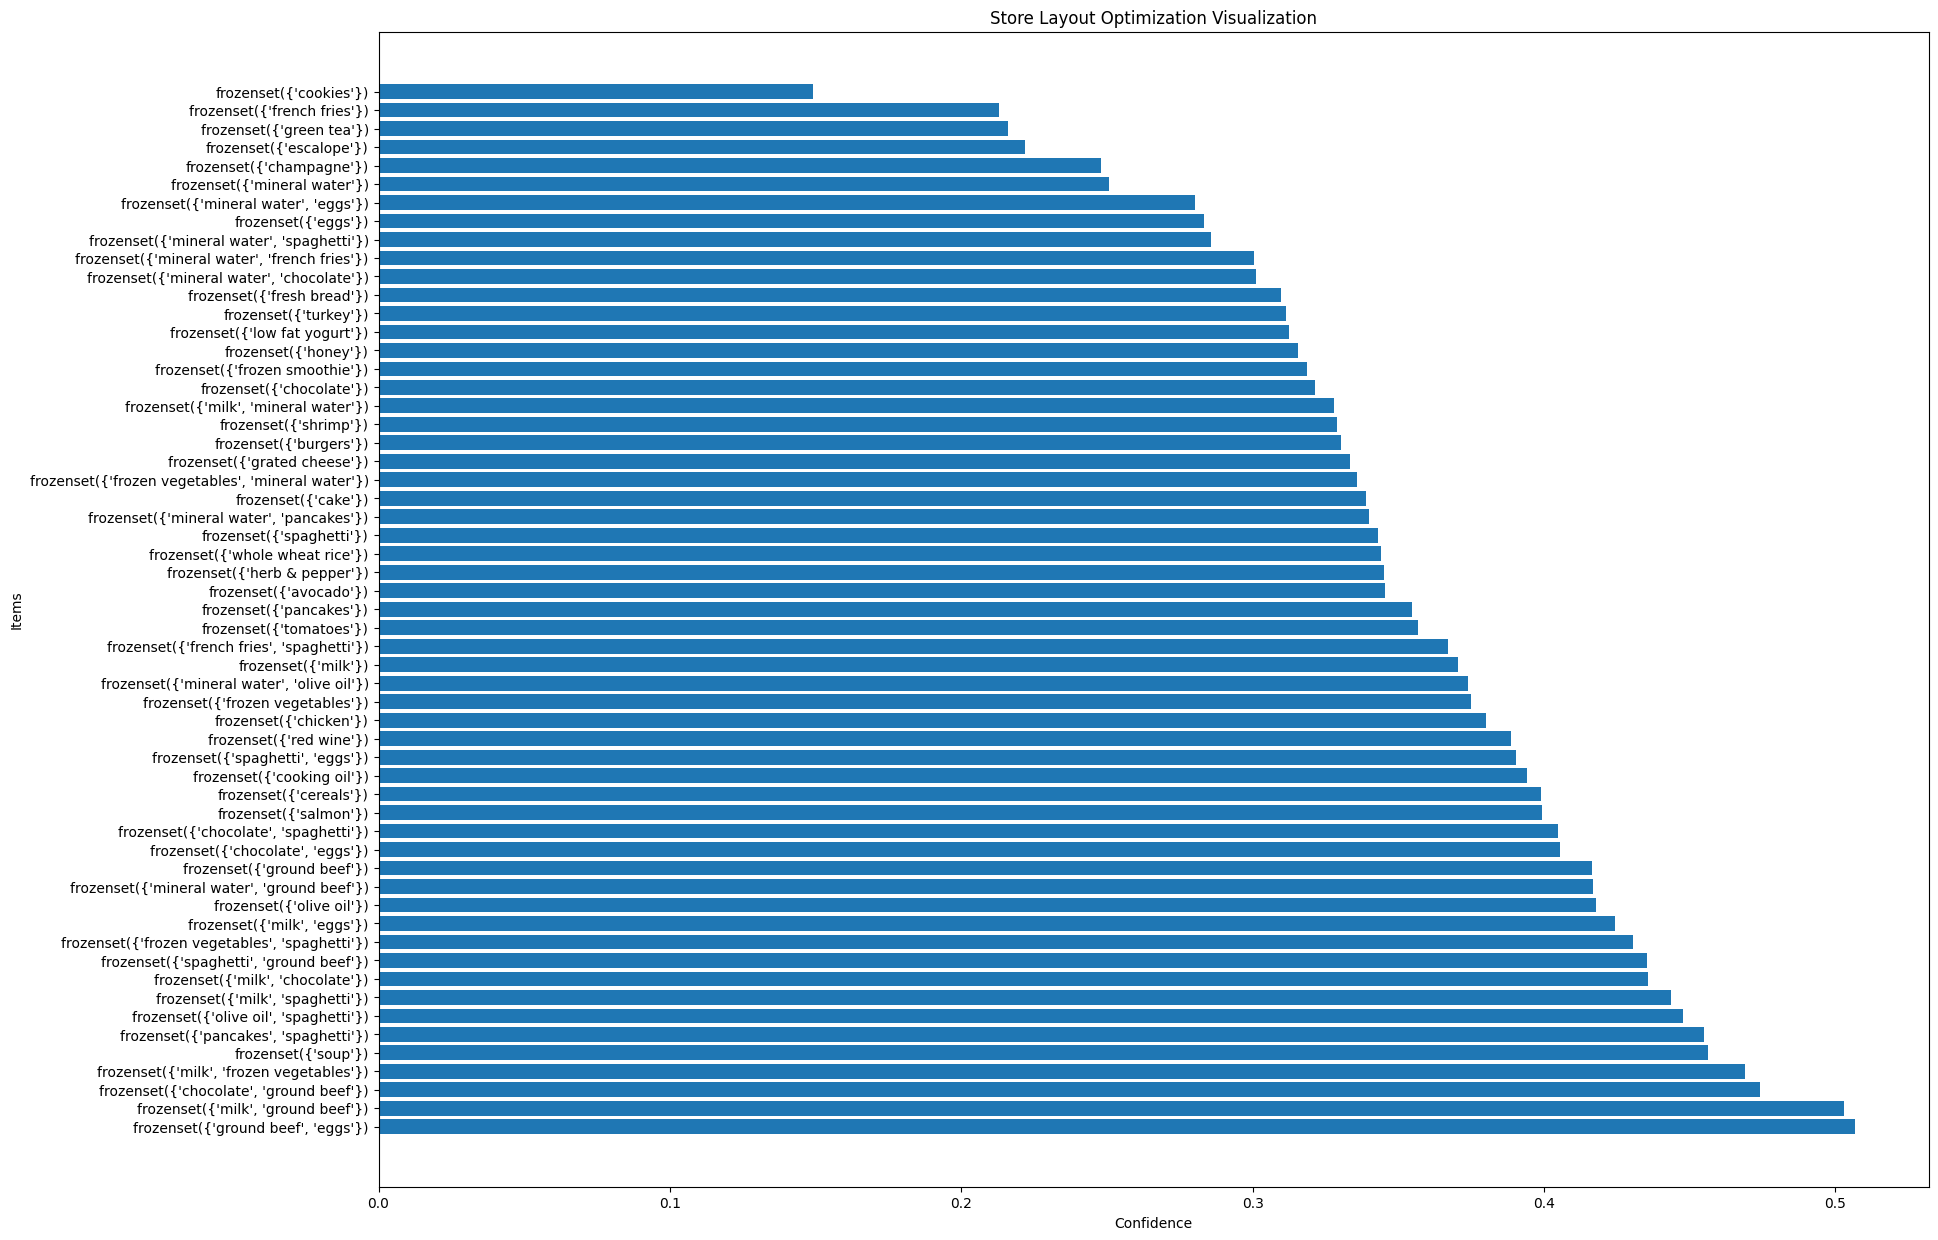

In [ ]:
store_layout_df = rulep[rulep['confidence'] > 0.1]
store_layout_df = store_layout_df.sort_values(by=['confidence'], ascending=False)

plt.figure(figsize=(20, 15))
plt.barh([str(item) for item in list(store_layout_df['antecedents'])], store_layout_df['confidence'])
plt.xlabel('Confidence')
plt.ylabel('Items')
plt.title('Store Layout Optimization Visualization')
plt.show()

Creating a heatmap for the cross-selling strategy matrix

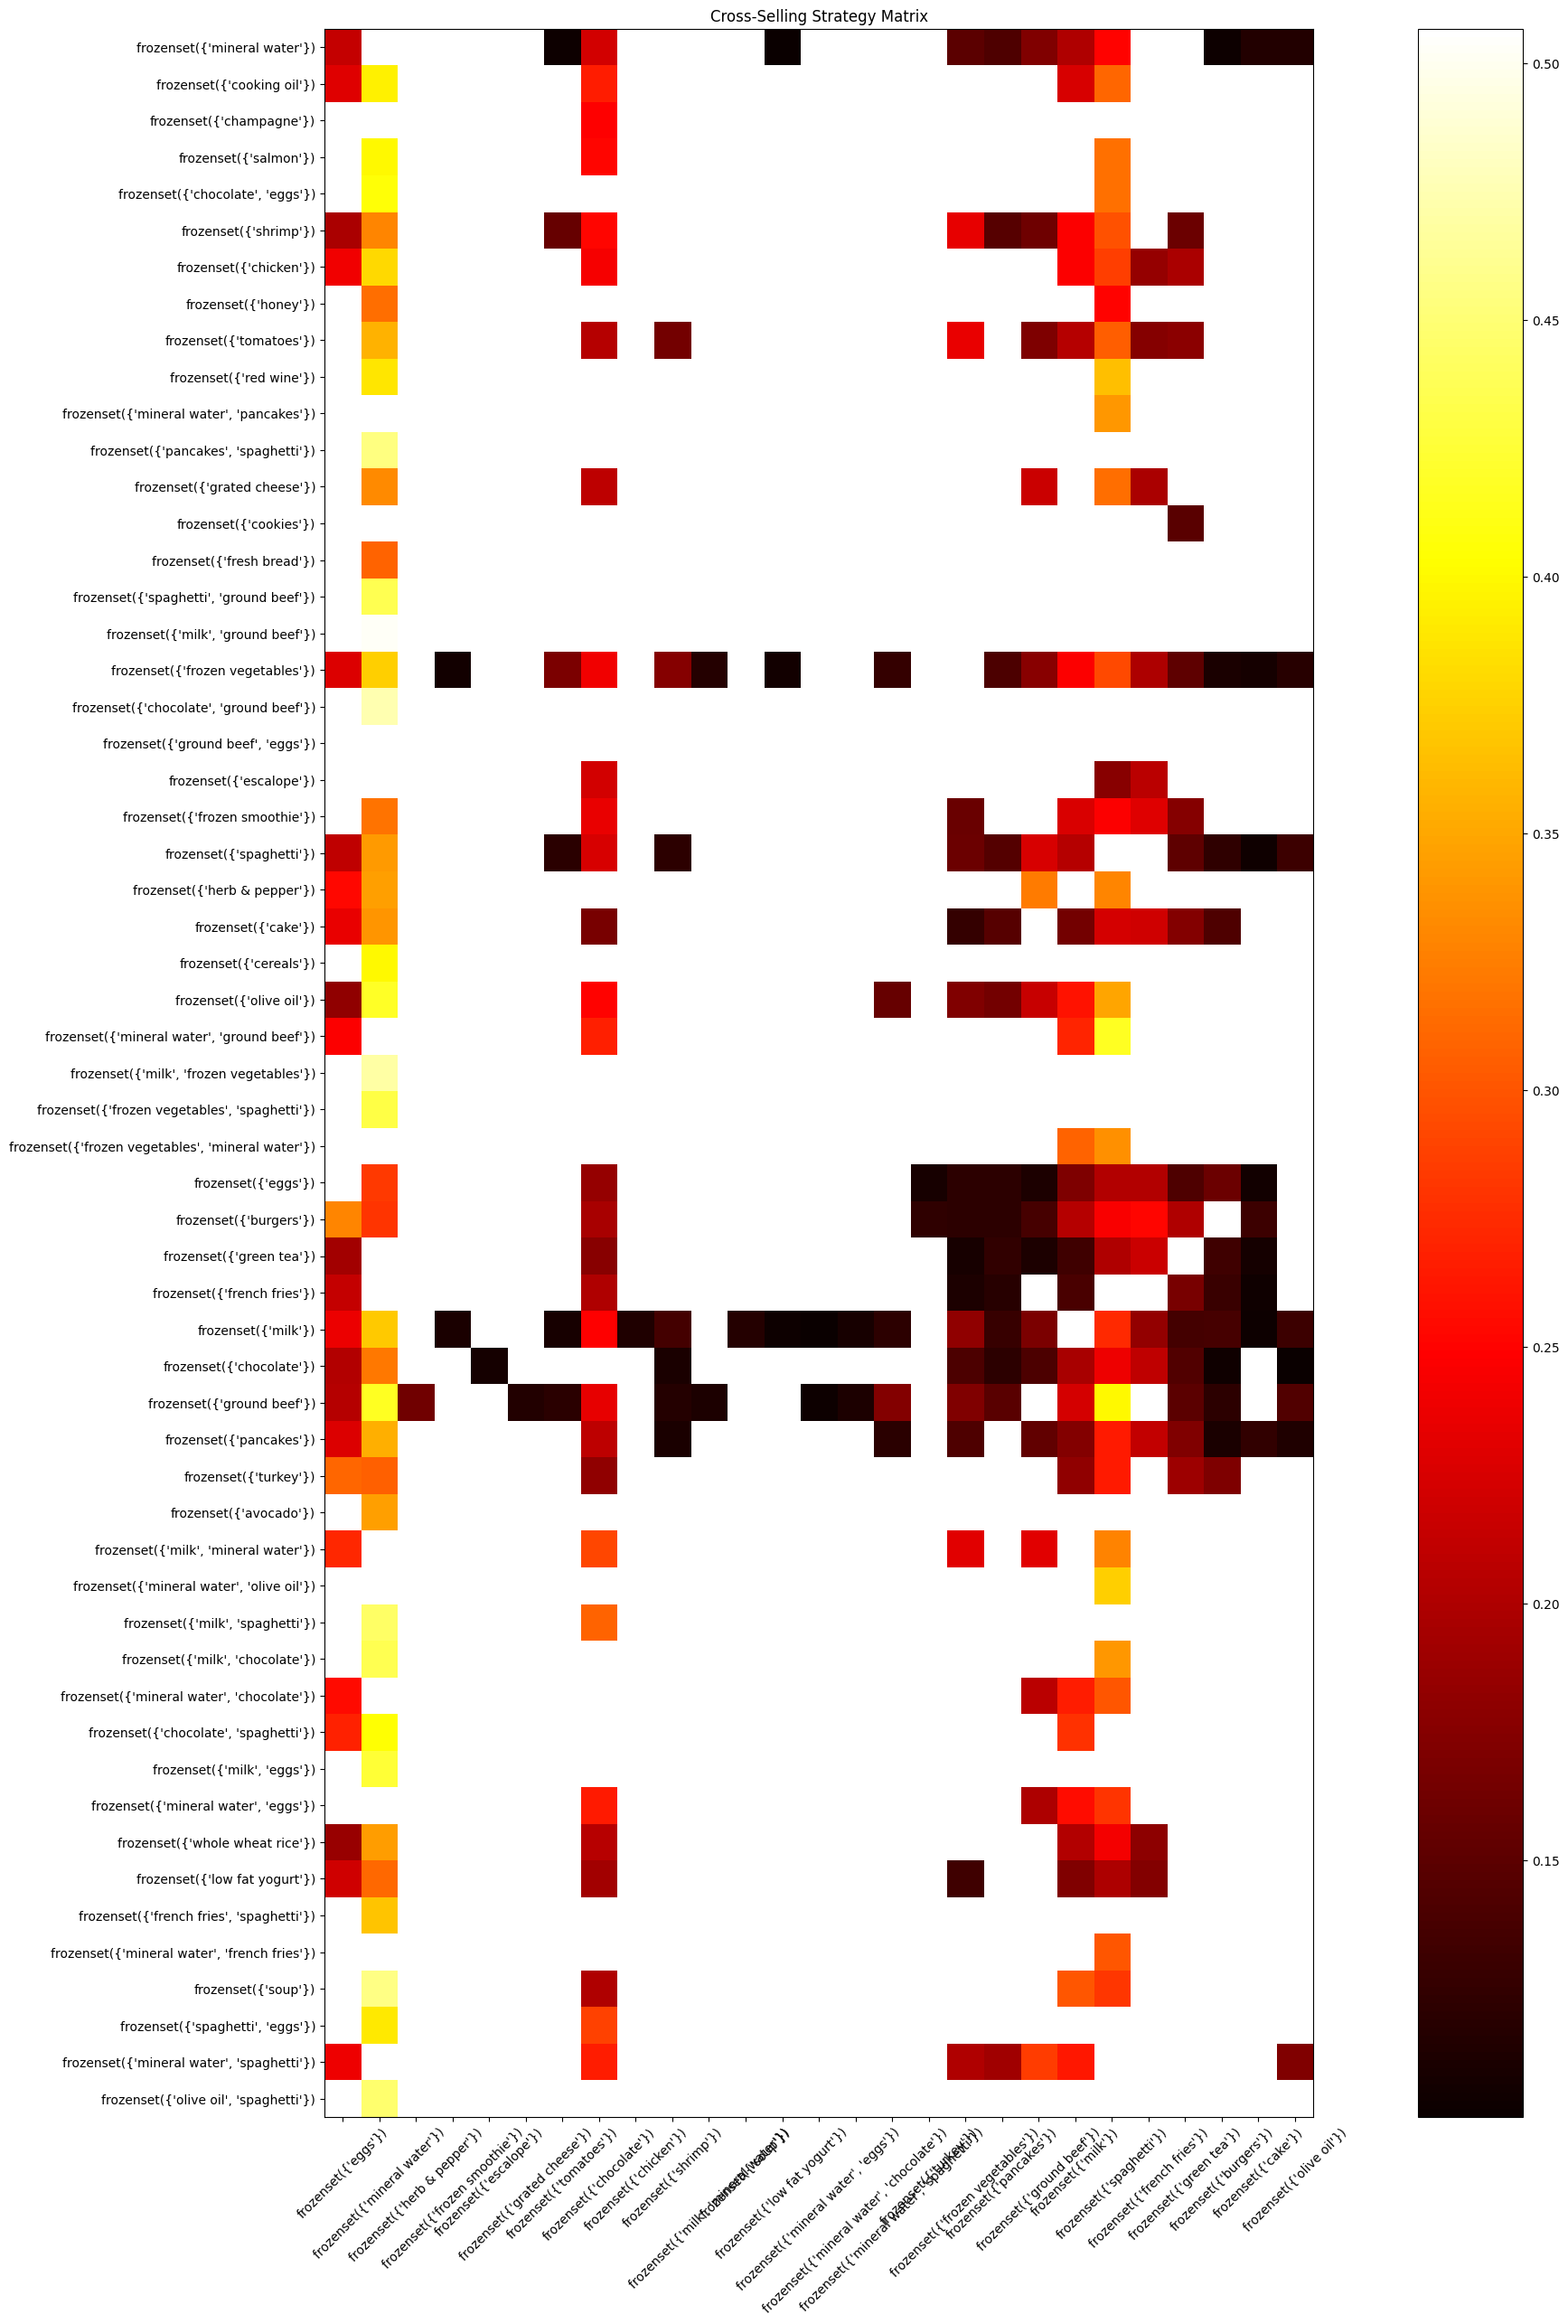

In [ ]:
cross_selling_df = rulep[rulep['confidence'] > 0.1]
cross_selling_df = cross_selling_df.pivot_table(index='antecedents', columns='consequents', values='confidence')

plt.figure(figsize=(30, 30))
plt.imshow(cross_selling_df, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(cross_selling_df.columns)), cross_selling_df.columns, rotation=45)
plt.yticks(range(len(cross_selling_df.index)), cross_selling_df.index)
plt.title('Cross-Selling Strategy Matrix')
plt.show()

Converting Frequency of items into a Datafrrame

In [ ]:
# Create a dictionary to store the frequency of each item
item_frequencies = {}
for item in flattened_list:
    if item not in item_frequencies:
        item_frequencies[item] = 0
    item_frequencies[item] += 1

# Create a dataframe from the dictionary
data = pd.DataFrame.from_dict(item_frequencies, orient='index', columns=['Frequency'])

# Sort the dataframe by the frequency in descending order
data = data.sort_values(by=['Frequency'], ascending=False)
data.head(10)

,Frequency
mineral water,1787
eggs,1348
spaghetti,1306
french fries,1282
chocolate,1230
green tea,990
milk,972
ground beef,737
frozen vegetables,715
pancakes,713


Top 10 frequent items extracted into a new dataframe

In [ ]:
exp = data[:10]
exp

,Frequency
mineral water,1787
eggs,1348
spaghetti,1306
french fries,1282
chocolate,1230
green tea,990
milk,972
ground beef,737
frozen vegetables,715
pancakes,713


In [ ]:
a =[]
for i in range(len(exp)):
  a.append(exp.values[i][0])
a

[1787, 1348, 1306, 1282, 1230, 990, 972, 737, 715, 713]

Plotting top 10 frequent items

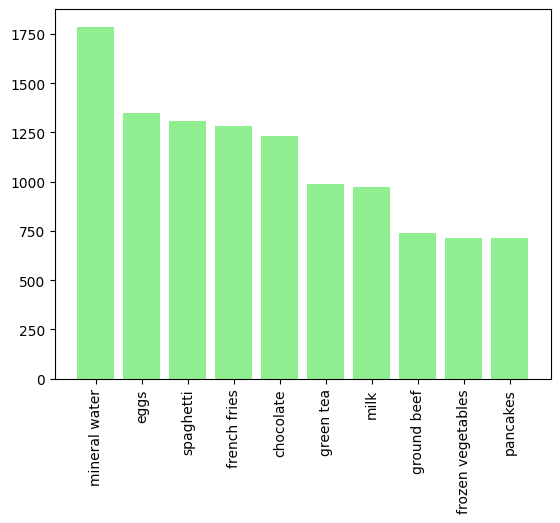

In [ ]:
plt.xticks(rotation=90)
plt.bar(exp.index, a, color='lightgreen');

Correlation among frequent items visualised using heatmap

<Axes: >

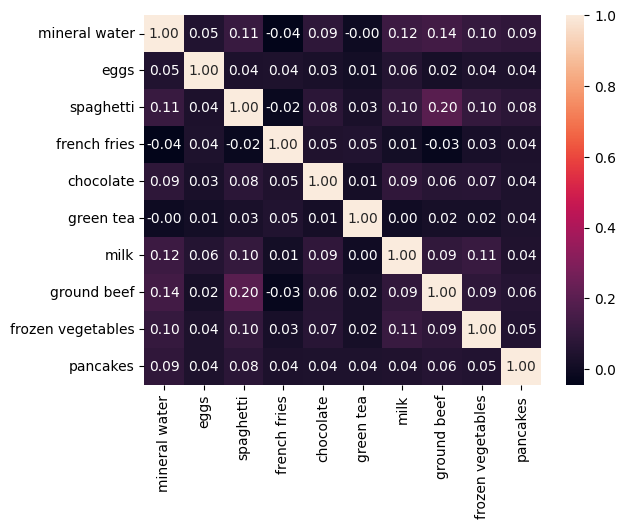

In [ ]:
sns.heatmap(df[exp.index].corr(), annot=True, fmt='0.2f')

Correlation Dataframe of frequent items

In [ ]:
b = df[exp.index].corr()
b

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes
mineral water,1.000000,0.049572,0.112920,-0.043612,0.086387,-0.003591,0.119653,0.138150,0.104055,0.088688
eggs,0.049572,1.000000,0.035958,0.039279,0.026369,0.013402,0.058209,0.020457,0.040783,0.041260
spaghetti,0.112920,0.035958,1.000000,-0.015167,0.075979,0.027638,0.101274,0.195672,0.101159,0.077729
french fries,-0.043612,0.039279,-0.015167,1.000000,0.045855,0.046852,0.012499,-0.026150,0.025065,0.035170
chocolate,0.086387,0.026369,0.075979,0.045855,1.000000,0.014656,0.087646,0.063203,0.067259,0.039499
green tea,-0.003591,0.013402,0.027638,0.046852,0.014656,1.000000,0.004335,0.018150,0.018268,0.038791
milk,0.119653,0.058209,0.101274,0.012499,0.087646,0.004335,1.000000,0.092667,0.114005,0.042764
ground beef,0.138150,0.020457,0.195672,-0.026150,0.063203,0.018150,0.092667,1.000000,0.086539,0.059460
frozen vegetables,0.104055,0.040783,0.101159,0.025065,0.067259,0.018268,0.114005,0.086539,1.000000,0.051124
pancakes,0.088688,0.041260,0.077729,0.035170,0.039499,0.038791,0.042764,0.059460,0.051124,1.000000


Correlation values categorized into HIGH, MEDIUM & LOW for frequent items

In [ ]:
for i in range(b.shape[0]):
  for j in range(b.shape[1]):
    if b.iloc[i,j] == 1:
      b.iloc[i,j] = '-'
    elif b.iloc[i,j] < 0:
      b.iloc[i,j] = 'LOW'
    elif b.iloc[i,j] > 0.06:
      b.iloc[i,j] = 'HIGH'
    else:
      b.iloc[i,j] = 'MED'
b

,mineral water,eggs,spaghetti,french fries,chocolate,green tea,milk,ground beef,frozen vegetables,pancakes
mineral water,-,MED,HIGH,LOW,HIGH,LOW,HIGH,HIGH,HIGH,HIGH
eggs,MED,-,MED,MED,MED,MED,MED,MED,MED,MED
spaghetti,HIGH,MED,-,LOW,HIGH,MED,HIGH,HIGH,HIGH,HIGH
french fries,LOW,MED,LOW,-,MED,MED,MED,LOW,MED,MED
chocolate,HIGH,MED,HIGH,MED,-,MED,HIGH,HIGH,HIGH,MED
green tea,LOW,MED,MED,MED,MED,-,MED,MED,MED,MED
milk,HIGH,MED,HIGH,MED,HIGH,MED,-,HIGH,HIGH,MED
ground beef,HIGH,MED,HIGH,LOW,HIGH,MED,HIGH,-,HIGH,MED
frozen vegetables,HIGH,MED,HIGH,MED,HIGH,MED,HIGH,HIGH,-,MED
pancakes,HIGH,MED,HIGH,MED,MED,MED,MED,MED,MED,-
